In [1]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///1kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///5kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///10kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///25kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///40kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///100kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///250kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//

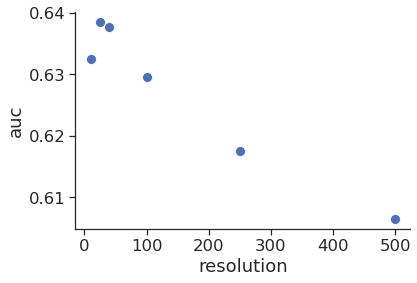

In [87]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [1, 5,10, 25,40, 100, 250, 500]
        reversed_list = res_list[::-1]
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['all/hic_gene_KR_KR_1_percent_per_chr.csv']

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                  for mapping in ['max']:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'/{resolution}kbp_raw/{mapping}/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())

In [ ]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [1, 5,10, 25,40, 100, 250, 500]
        reversed_list = res_list[::-1]
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['all/hic_gene_KR_KR_1_percent_per_chr.csv']

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                  for mapping in ['max']:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'/{resolution}kbp_raw/{mapping}/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())

        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'
                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            #print (f'{file_path}/{file_name}')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        #print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///10kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///25kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///40kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///100kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///250kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///500kbp_raw/max/all/hic_gene_KR_KR_1_percent_per_chr.csv
resolution
10     0.632450
25     0.638514
40     0.637621
100    0.629593
250    0.617456
500    0.606348
Name: auc, dtype: float64
SRP105082 250 1 SRP105082
SRP152979 250 6 SRP152979
SRP157799 250 34 SRP

/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///25kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///40kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///100kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///250kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates///500kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv
resolution
10     0.641485
25     0.648939
40     0.648162
100    0.639190
250    0.626679
500    0.615523
Name: auc, dtype: float64


<ipython-input-90-e889ea48ef8e>:127: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-90-e889ea48ef8e>:140: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


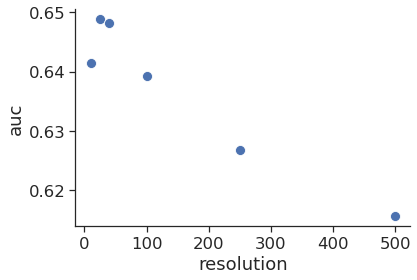

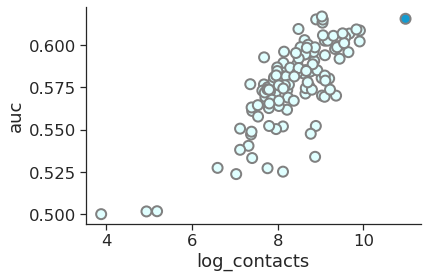

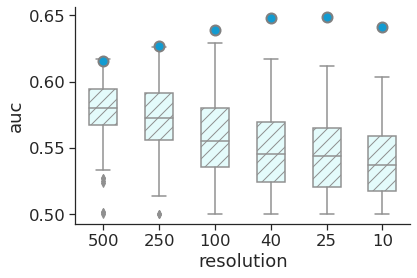

In [90]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100, 250, 500]
        reversed_list = res_list[::-1]
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                  for mapping in ['max']:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'/{resolution}kbp_raw/{mapping}/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())

        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'
                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            #print (f'{file_path}/{file_name}')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        #print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


In [97]:
ll = dk[dk['agg_type']=='proj_agg']
ll[ll['resolution']==10]['auc'].median()

0.5372102940974445

In [8]:
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

In [76]:
df_density = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/stats/project_density_inter_10.csv')


In [77]:
df_density['density'].max()

0.0884846016002355

In [21]:
dk.merge(df_density, left_on='proj', right_on='proj_id')

proj  resolution  agg_type       auc  counts_inter  log_contacts  \
0    DRP005173          10  proj_agg  0.516244      47718444      7.678686   
1    DRP005173          25  proj_agg  0.519237      47718444      7.678686   
2    DRP005173          40  proj_agg  0.522148      47718444      7.678686   
3    DRP005173         100  proj_agg  0.534380      47718444      7.678686   
4    DRP005173         250  proj_agg  0.559726      47718444      7.678686   
..         ...         ...       ...       ...           ...           ...   
709  SRP274139          25  proj_agg  0.529864     134998720      8.130330   
710  SRP274139          40  proj_agg  0.534597     134998720      8.130330   
711  SRP274139         100  proj_agg  0.548172     134998720      8.130330   
712  SRP274139         250  proj_agg  0.565891     134998720      8.130330   
713  SRP274139         500  proj_agg  0.574302     134998720      8.130330   

       project  runs experiment type  \
0    DRP005173   9.0               o   
1    DRP005173   9.0               o   
2    DRP005173   9.0               o   
3    DRP005173   9.0               o   
4    DRP005173   9.0               o   
..         ...   ...             ...   
709  SRP274139   3.0            Hi-C   
710  SRP274139   3.0            Hi-C   
711  SRP274139   3.0            Hi-C   
712  SRP274139   3.0            Hi-C   
713  SRP274139   3.0            Hi-C   

                                   experiment type2  \
0    "inexpensive and controllable Hi-C (iconHi-C)"   
1    "inexpensive and controllable Hi-C (iconHi-C)"   
2    "inexpensive and controllable Hi-C (iconHi-C)"   
3    "inexpensive and controllable Hi-C (iconHi-C)"   
4    "inexpensive and controllable Hi-C (iconHi-C)"   
..                                              ...   
709                                            Hi-C   
710                                            Hi-C   
711                                            Hi-C   
712                                            Hi-C   
713                                            Hi-C   

                                              SRA link  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
709  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
710  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
711  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
712  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
713  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   

                                           Paper title  \
0    Multifaceted Hi-C benchmarking for chromosome-...   
1    Multifaceted Hi-C benchmarking for chromosome-...   
2    Multifaceted Hi-C benchmarking for chromosome-...   
3    Multifaceted Hi-C benchmarking for chromosome-...   
4    Multifaceted Hi-C benchmarking for chromosome-...   
..                                                 ...   
709  STAG2 loss-of-function affects short-range gen...   
710  STAG2 loss-of-function affects short-range gen...   
711  STAG2 loss-of-function affects short-range gen...   
712  STAG2 loss-of-function affects short-range gen...   
713  STAG2 loss-of-function affects short-range gen...   

                                            Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0    This study provides the first comparison of mu...        NaN        NaN   
1    This study provides the first comparison of mu...        NaN        NaN   
2    This study provides the first comparison of mu...        NaN        NaN   
3    This study provides the first comparison of mu...        NaN        NaN   
4    This study provides the first comparison of mu...        NaN        NaN   
..                                                 ...   

<ipython-input-78-f6bf882d28e7>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-78-f6bf882d28e7>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


[]

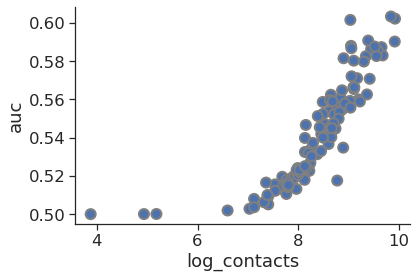

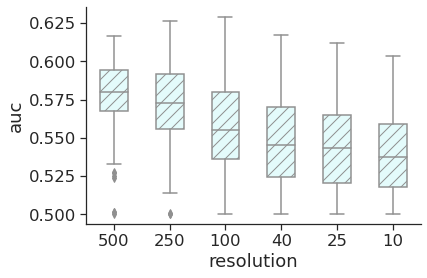

In [78]:
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        dk = dk.merge(df_density, left_on='proj', right_on='proj_id')
        #print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc', style='agg_type', hue='agg_type',edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


<ipython-input-75-e1522e718b3c>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-75-e1522e718b3c>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


[]

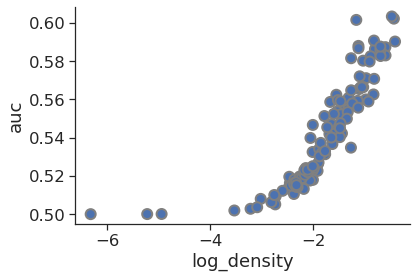

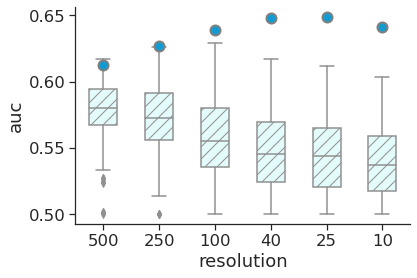

In [75]:
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]
        

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        dk = dk.merge(df_density, left_on='proj', right_on='proj_id', how='left')
        dk['log_density'] = [np.log10(x) for x in dk['density']]
        #print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==10], x='log_density', y='auc', style='agg_type', hue='agg_type',edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


<ipython-input-62-62835574bff6>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-62-62835574bff6>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


[]

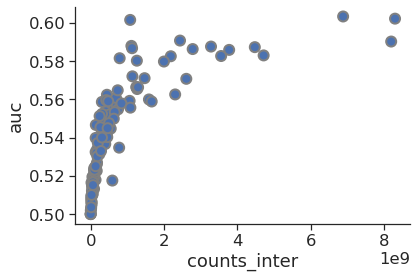

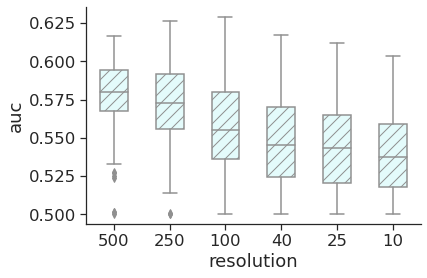

In [62]:
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        dk = dk.merge(df_density, left_on='proj', right_on='proj_id')
        #print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==10], x='counts_inter', y='auc', style='agg_type', hue='agg_type',edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


In [54]:
        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()



<ipython-input-54-4a61dea5eef1>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()


In [55]:
dt

proj  resolution  agg_type       auc  counts_inter
0    DRP005173          10  proj_agg  0.516244      47718444
1    DRP005173          25  proj_agg  0.519237      47718444
2    DRP005173          40  proj_agg  0.522148      47718444
3    DRP005173         100  proj_agg  0.534380      47718444
4    DRP005173         250  proj_agg  0.559726      47718444
..         ...         ...       ...       ...           ...
715        all          25      meta  0.648939   96455324722
716        all          40      meta  0.648162   96455324722
717        all         100      meta  0.639190   96455324722
718        all         250      meta  0.626679   96455324722
719        all         500      meta  0.612327   96455324722

[720 rows x 5 columns]

In [ ]:
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        dk = dk.merge(df_density, left_on='proj', right_on='proj_id')
        #print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==10], x='density', y='auc', style='agg_type', hue='agg_type',edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


In [40]:
dk

proj  resolution  agg_type       auc  counts_inter  log_contacts  \
0    DRP005173          10  proj_agg  0.516244      47718444      7.678686   
1    DRP005173          25  proj_agg  0.519237      47718444      7.678686   
2    DRP005173          40  proj_agg  0.522148      47718444      7.678686   
3    DRP005173         100  proj_agg  0.534380      47718444      7.678686   
4    DRP005173         250  proj_agg  0.559726      47718444      7.678686   
..         ...         ...       ...       ...           ...           ...   
709  SRP274139          25  proj_agg  0.529864     134998720      8.130330   
710  SRP274139          40  proj_agg  0.534597     134998720      8.130330   
711  SRP274139         100  proj_agg  0.548172     134998720      8.130330   
712  SRP274139         250  proj_agg  0.565891     134998720      8.130330   
713  SRP274139         500  proj_agg  0.574302     134998720      8.130330   

       project  runs experiment type  \
0    DRP005173   9.0               o   
1    DRP005173   9.0               o   
2    DRP005173   9.0               o   
3    DRP005173   9.0               o   
4    DRP005173   9.0               o   
..         ...   ...             ...   
709  SRP274139   3.0            Hi-C   
710  SRP274139   3.0            Hi-C   
711  SRP274139   3.0            Hi-C   
712  SRP274139   3.0            Hi-C   
713  SRP274139   3.0            Hi-C   

                                   experiment type2  \
0    "inexpensive and controllable Hi-C (iconHi-C)"   
1    "inexpensive and controllable Hi-C (iconHi-C)"   
2    "inexpensive and controllable Hi-C (iconHi-C)"   
3    "inexpensive and controllable Hi-C (iconHi-C)"   
4    "inexpensive and controllable Hi-C (iconHi-C)"   
..                                              ...   
709                                            Hi-C   
710                                            Hi-C   
711                                            Hi-C   
712                                            Hi-C   
713                                            Hi-C   

                                              SRA link  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
709  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
710  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
711  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
712  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
713  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   

                                           Paper title  \
0    Multifaceted Hi-C benchmarking for chromosome-...   
1    Multifaceted Hi-C benchmarking for chromosome-...   
2    Multifaceted Hi-C benchmarking for chromosome-...   
3    Multifaceted Hi-C benchmarking for chromosome-...   
4    Multifaceted Hi-C benchmarking for chromosome-...   
..                                                 ...   
709  STAG2 loss-of-function affects short-range gen...   
710  STAG2 loss-of-function affects short-range gen...   
711  STAG2 loss-of-function affects short-range gen...   
712  STAG2 loss-of-function affects short-range gen...   
713  STAG2 loss-of-function affects short-range gen...   

                                            Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0    This study provides the first comparison of mu...        NaN        NaN   
1    This study provides the first comparison of mu...        NaN        NaN   
2    This study provides the first comparison of mu...        NaN        NaN   
3    This study provides the first comparison of mu...        NaN        NaN   
4    This study provides the first comparison of mu...        NaN        NaN   
..                                                 ...   

<AxesSubplot:xlabel='density', ylabel='counts_inter'>

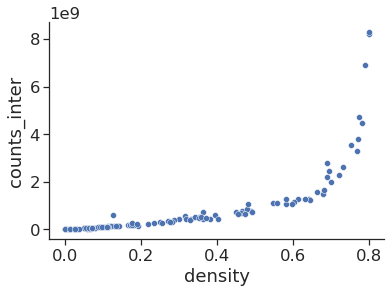

In [60]:
sns.scatterplot(data=dk[dk['resolution']==10], x='density', y='counts_inter')

<AxesSubplot:xlabel='density', ylabel='counts_inter'>

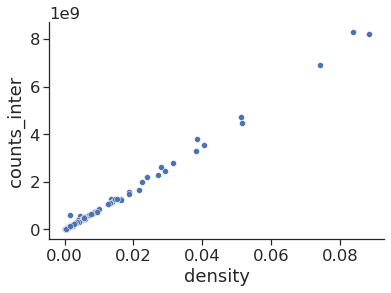

In [79]:
sns.scatterplot(data=dk[dk['resolution']==10], x='density', y='counts_inter')

<AxesSubplot:xlabel='density', ylabel='counts_inter'>

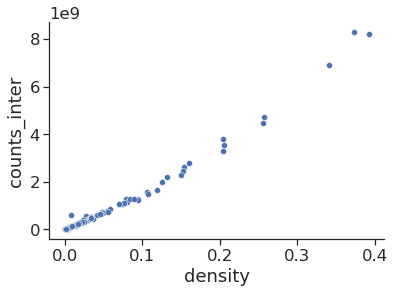

In [73]:
sns.scatterplot(data=dk[dk['resolution']==10], x='density', y='counts_inter')

In [49]:
df = pd.concat([df_whole_agg, df_ind])

In [53]:
df[df['proj']=='all']

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file  \
0      ENSG00000230585          chr1  ENSG00000230585           chr1   
1      ENSG00000137970          chr1  ENSG00000137970           chr1   
2      ENSG00000234241         chr20  ENSG00000234241          chr20   
3      ENSG00000137154          chr9  ENSG00000137154           chr9   
4      ENSG00000177511         chr18  ENSG00000177511          chr18   
...                ...           ...              ...            ...   
23460  ENSG00000212978          chr2  ENSG00000212978           chr2   
23461  ENSG00000274712         chr17  ENSG00000274712          chr17   
23462  ENSG00000136213          chr7  ENSG00000136213           chr7   
23463  ENSG00000159082         chr21  ENSG00000159082          chr21   
23464  ENSG00000132664         chr20  ENSG00000132664          chr20   

            auc species  resolution mapping     coef  bin_type percentile  \
0      0.681370   human          10     max  jac_sim  all_bins         90   
1      0.411275   human          10     max  jac_sim  all_bins         90   
2      0.564968   human          10     max  jac_sim  all_bins         90   
3      0.460525   human          10     max  jac_sim  all_bins         90   
4      0.850424   human          10     max  jac_sim  all_bins         90   
...         ...     ...         ...     ...      ...       ...        ...   
23460  0.611433   human         500     max  jac_sim  all_bins         90   
23461  0.596750   human         500     max  jac_sim  all_bins         90   
23462  0.847825   human         500     max  jac_sim  all_bins         90   
23463  0.478536   human         500     max  jac_sim  all_bins         90   
23464  0.489970   human         500     max  jac_sim  all_bins         90   

         KR_type                                              pairs  \
0      KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
1      KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
2      KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
3      KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
4      KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
...          ...                                                ...   
23460  KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
23461  KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
23462  KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
23463  KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   
23464  KR_ranked  inter_only/hic_gene_KR_inter_1_percent_per_chr...   

       coexp_percentile agg_type proj edge_type  counts_inter  
0                   1.0     meta  all             96455324722  
1                   1.0     meta  all             96455324722  
2                   1.0     meta  all             96455324722  
3                   1.0     meta  all             96455324722  
4                   1.0     meta  all             96455324722  
...                 ...      ...  ...       ...           ...  
23460               1.0     meta  all             96455324722  
23461               1.0     meta  all             96455324722  
23462               1.0     meta  all             96455324722  
23463               1.0     meta  all             96455324722  
23464               1.0     meta  all             96455324722  

[140790 rows x 18 columns]